> # Analysis Covid-19 Timelines
> by **[Uwe Wlaschny](https://www.linkedin.com/in/uwe-wlaschny-1a949a19a/)**, September 2020<br>
> **Final project for the course [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas)**
<br>
<br>
<br>
[![Python](https://img.shields.io/badge/python-3.8.5-blue)]()
[![pandas](https://img.shields.io/badge/pandas-1.1.0-blue)]()
[![numpy](https://img.shields.io/badge/numpy-1.18.5-blue)]()
[![matplotlib](https://img.shields.io/badge/matplotlib-3.3.0-blue)]()

---

**Disclaimer**:<br>
**The information included at this site is for educational purposes only**. 

This notebook I created as final project for the course [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). I picked the [Time_series_covid19_confirmed_global.csv](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) Dataset, which is created by the [Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) and will be updated daily often times. With [Visual Dashboard (desktop)](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) exist a worldwide status summary.

The data set is licensed under the [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

**Note:** Internet connection is necessary, cause the data will be live downloaded.

---

In [9]:
%reload_ext watermark
%watermark -a uwsd -u -v -n -t -p numpy,pandas,matplotlib,seaborn

uwsd 
last updated: Fri Oct 09 2020 20:43:24 

CPython 3.8.5
IPython 7.18.1

numpy 1.19.1
pandas 1.1.2
matplotlib 3.3.2
seaborn 0.11.0
tensorflow 2.4.0-dev20200904
sklearn 0.23.2


In [426]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

%matplotlib inline
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.top': False,
    'axes.spines.bottom': True})
plt.style.use('seaborn-whitegrid')

import os, urllib, jovian
from datetime import datetime

<IPython.core.display.Javascript object>

In [427]:
project_name = "analysis-covid-19-timelines"

In [428]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "uwsd/analysis-covid-19-timelines"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/uwsd/analysis-covid-19-timelines


'https://jovian.ml/uwsd/analysis-covid-19-timelines'

---
## Fetching Data
The dataset will be saved in a subfolder, named with the current date. If you run this notebook again at the same day, the datafile will be overwritten.

In [204]:
import os, urllib
from datetime import datetime

# Create directory
dirName = f'data/{datetime.today().date()}'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("File " , dirName ,  " created ") 
except FileExistsError:
    print("File " , dirName ,  " already exists")

fhand = urllib.request.urlopen('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

with open(f'data/{datetime.today().date()}/time_series_covid19_confirmed_global.csv', mode='wb') as outputFile:
    outputFile.write(fhand.read()) 

File  data/2020-10-10  already exists


In [274]:
df = pd.read_csv(f'data/{datetime.today().date()}/time_series_covid19_confirmed_global.csv', index_col='Country/Region')
df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,34,68,0,0,0,0,0,0,0,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616
Albania,NaN,41,20,0,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899
Algeria,NaN,28,2,0,0,0,0,0,0,0,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658
Andorra,NaN,43,2,0,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568
Angola,NaN,-11,18,0,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958


---
## 2. Data Preparation and Cleaning

I fetch only data from countries/regions. This means the data rows which are in the field `Province/State` `NaN` will be deleted, in addition `Lat` and `Long`.

---

In [275]:
df = df[df['Province/State'].isna()]
df.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616
Albania,0,0,0,0,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899
Algeria,0,0,0,0,0,0,0,0,0,0,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658
Andorra,0,0,0,0,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568
Angola,0,0,0,0,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958


Now we have **daily aggregated** data from the following countries/regions:

In [276]:
regions = df.index.to_list()
print(regions)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 

---
Now we can choice some countries for deeper analytics:

In [277]:
countries = ['Germany', 'US', 'Russia', 'United Kingdom', 'Italy', 'France', 'Singapore', 'Brazil', 'Peru', 'India', 'Spain', 'Sweden']

In [278]:
df.loc[countries]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,1,4,4,4,5,...,290471,292913,295539,298374,300027,301573,304673,307127,311137,315941
US,1,1,2,2,5,5,5,6,6,8,...,7191637,7233042,7277791,7332297,7382341,7417845,7457402,7499341,7549682,7605873
Russia,0,0,0,0,0,0,0,0,0,2,...,1162428,1170799,1179634,1188928,1198663,1209039,1219796,1231277,1242258,1253603
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,446156,453264,460178,467146,480017,502978,515571,530113,544275,561815
Italy,0,0,0,0,0,0,0,0,0,2,...,313011,314861,317409,319908,322751,325329,327586,330263,333940,338398
France,0,0,2,3,3,3,4,5,5,5,...,564690,576907,589825,601971,601971,601971,636196,646531,664178,682192
Singapore,0,1,3,3,4,5,7,7,10,13,...,57742,57765,57784,57794,57800,57812,57819,57830,57840,57849
Brazil,0,0,0,0,0,0,0,0,0,0,...,4777522,4810935,4847092,4847092,4906833,4915289,4927235,4969141,5000694,5028444
Peru,0,0,0,0,0,0,0,0,0,0,...,808714,811768,814829,818297,821564,821564,828169,829999,832929,835662


---
Now this selected countries-list with aggregated data in a graph (last 180 days) and logarithmic y-axis:

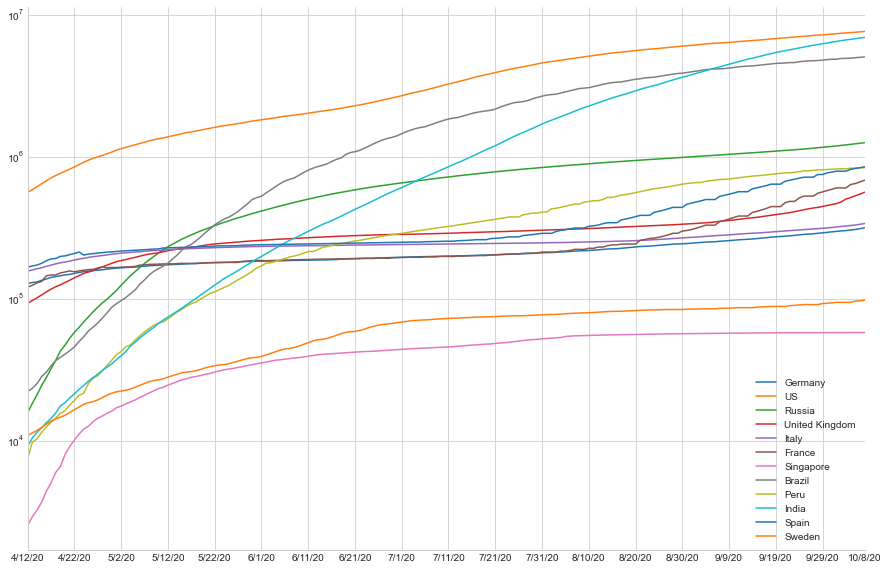

In [326]:
fig, ax = plt.subplots()
ax.grid('on')
ax.margins(x=0, y=0.05)
for index, row in df.loc[countries].iterrows():
    
    xticks = plt.gca().xaxis.get_major_ticks()

    for i in range(len(xticks)):
        if i % 10 != 0 or i > len(xticks) - 3:
            xticks[i].set_visible(False)
    xticks[len(xticks)-1].set_visible(True)
    
    data = row[-180:]
    ax.plot(data, label=index)
    ax.legend()
    ax.set_yscale('log')

---
### Convert to daily data

In [279]:
daily = df[df.columns[4:]].diff(axis = 1)
daily

,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,nan,0,0,0,0,0,0,0,0,0,...,21,14,17,5,7,44,81,64,62,68
Albania,nan,0,0,0,0,0,0,0,0,0,...,127,131,157,159,152,149,144,158,162,169
Algeria,nan,0,0,0,0,0,0,0,0,0,...,155,162,160,157,148,141,134,129,121,138
Andorra,nan,0,0,0,0,0,0,0,0,0,...,0,84,0,60,0,0,260,0,198,0
Angola,nan,0,0,0,0,0,0,0,0,0,...,108,67,142,97,159,32,128,195,0,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,nan,0,0,0,0,0,0,0,0,0,...,420,358,423,444,312,420,459,475,408,416
Western Sahara,nan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,nan,0,0,0,0,0,0,0,0,0,...,0,3,5,1,1,0,0,6,2,1


Or again our selected countries:

In [281]:
df.loc[countries]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,1,4,4,4,5,...,290471,292913,295539,298374,300027,301573,304673,307127,311137,315941
US,1,1,2,2,5,5,5,6,6,8,...,7191637,7233042,7277791,7332297,7382341,7417845,7457402,7499341,7549682,7605873
Russia,0,0,0,0,0,0,0,0,0,2,...,1162428,1170799,1179634,1188928,1198663,1209039,1219796,1231277,1242258,1253603
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,446156,453264,460178,467146,480017,502978,515571,530113,544275,561815
Italy,0,0,0,0,0,0,0,0,0,2,...,313011,314861,317409,319908,322751,325329,327586,330263,333940,338398
France,0,0,2,3,3,3,4,5,5,5,...,564690,576907,589825,601971,601971,601971,636196,646531,664178,682192
Singapore,0,1,3,3,4,5,7,7,10,13,...,57742,57765,57784,57794,57800,57812,57819,57830,57840,57849
Brazil,0,0,0,0,0,0,0,0,0,0,...,4777522,4810935,4847092,4847092,4906833,4915289,4927235,4969141,5000694,5028444
Peru,0,0,0,0,0,0,0,0,0,0,...,808714,811768,814829,818297,821564,821564,828169,829999,832929,835662


---
## Convert to daily data (7-day-gliding values)

At the example "France"  we can see that the daily data has often 0 Values. The reason is that in some countries over the weekend there will be no data reported. This problem is in the `df` Dataframe the same, but there it is not so important.

In [301]:
daily.loc['France'][-14:]

9/25/20   15797
9/26/20       0
9/27/20       0
9/28/20   25278
9/29/20   11858
9/30/20   12217
10/1/20   12918
10/2/20   12146
10/3/20       0
10/4/20       0
10/5/20   34225
10/6/20   10335
10/7/20   17647
10/8/20   18014
Name: France, dtype: float64

---
But we can change the dataset into a 7 day gliding data window:

In [305]:
window_7days_per_day = df.diff(axis = 1, periods = 7) / 7

And now the data from "France" look like:

In [306]:
window_7days_per_day.loc['France'][-14:]

9/25/20   11797
9/26/20   11797
9/27/20   11797
9/28/20   11265
9/29/20   11533
9/30/20   13279
10/1/20   11153
10/2/20   10631
10/3/20   10631
10/4/20   10631
10/5/20   11909
10/6/20   11692
10/7/20   12467
10/8/20   13195
Name: France, dtype: float64

---
We can now plot the data. I choice again the selected countries-list. I select the last 180 days and the y-axis will be logarithmic scaled:

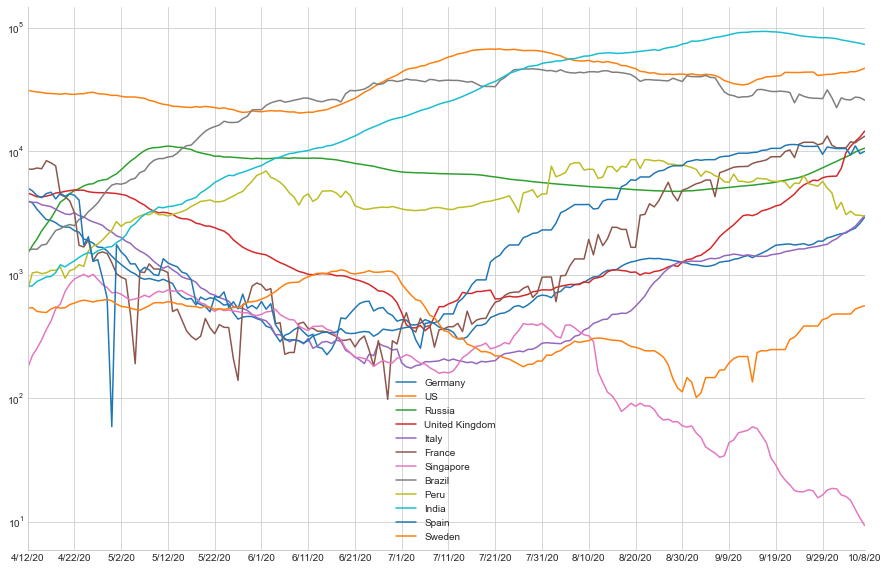

In [311]:
fig, ax = plt.subplots()
ax.grid('on')
ax.margins(x=0, y=0.05)

for index, row in window_7days_per_day.loc[countries].iterrows():
    
    xticks = plt.gca().xaxis.get_major_ticks()
    for i in range(len(xticks)):
        if i % 10 != 0 or i > len(xticks) - 3:
            xticks[i].set_visible(False)
    xticks[len(xticks)-1].set_visible(True)

    data = row[-180:]
    ax.plot(data, label=index)
    ax.legend()
    ax.set_yscale('log')

---
### Aggregate columns into new columns
Here I want to aggregate the date columns into year/month columns

In [312]:
month_cols = daily.columns[1:]

In [313]:
for col in month_cols:
    dt = datetime.strptime(col, '%m/%d/%y')
    year_month_col = dt.strftime("%Y%m")
    if year_month_col not in daily.columns:
        daily[year_month_col] = daily[col]
    else:
        daily[year_month_col] += daily[col]

In [314]:
daily

,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,nan,0,0,0,0,0,0,0,0,0,...,0,1,173,1997,13034,16312,5158,1490,1103,348
Albania,nan,0,0,0,0,0,0,0,0,0,...,0,0,243,530,364,1398,2741,4237,4136,1250
Algeria,nan,0,0,0,0,0,0,0,0,0,...,0,1,715,3290,5388,4513,16487,14100,7036,1128
Andorra,nan,0,0,0,0,0,0,0,0,0,...,0,0,376,369,19,91,70,251,874,518
Angola,nan,0,0,0,0,0,0,0,0,0,...,0,0,7,20,59,198,864,1506,2318,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,nan,0,0,0,0,0,0,0,0,0,...,0,0,119,225,104,1980,9409,10892,17170,3357
Western Sahara,nan,0,0,0,0,0,0,0,0,0,...,0,0,0,6,3,1,0,0,0,0
Yemen,nan,0,0,0,0,0,0,0,0,0,...,0,0,0,6,317,835,570,230,76,16


---
Now you can select one specific country to the cumulated monthly values:

In [323]:
daily.loc['Germany', '202001':]

202001       5
202002      74
202003   71729
202004   91201
202005   20401
202006   12008
202007   14981
202008   34403
202009   48111
202010   23028
Name: Germany, dtype: float64

---
or our selected countries-list:

In [322]:
daily.loc[countries, '202001':]

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010
Country/Region,,,,,,,,,,
Germany,5,74,71729,91201,20401,12008,14981,34403,48111,23028
US,3,17,192066,884598,719956,837226,1925840,1468931,1204400,372831
Russia,2,0,2335,104161,299345,241086,191532,153941,178397,82804
United Kingdom,2,59,38423,139059,78602,27565,19471,32692,117391,108551
Italy,2,1126,104664,99671,27534,7581,6959,21677,45647,23537
France,2,95,52028,113636,20087,8522,18720,89082,274732,105285
Singapore,9,89,824,15243,18715,9023,8298,4607,953,84
Brazil,0,2,5715,81470,427662,887192,1260444,1245787,902663,217509
Peru,0,0,1065,35911,127500,120737,122279,239674,164602,23894


---
## Q: Which were monthly the countries with the most confirmed cases?

In [363]:
monthly_values = daily.loc[:, '202001':] # total list
# monthly_values = daily.loc[countries, '202001':] # selected countries list

In [422]:
col = '202001'
dt = (datetime.strptime(col, '%Y%m')).strftime("%B %Y")
dt
#     year_month_col = dt.strftime("%Y%m")

'January 2020'

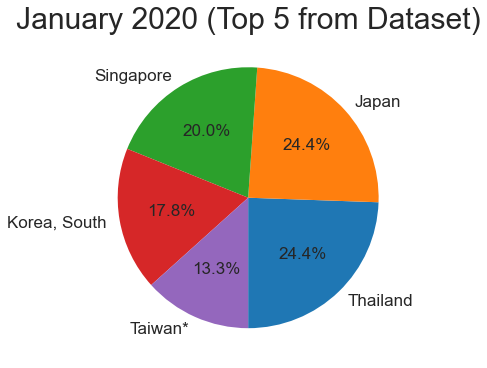

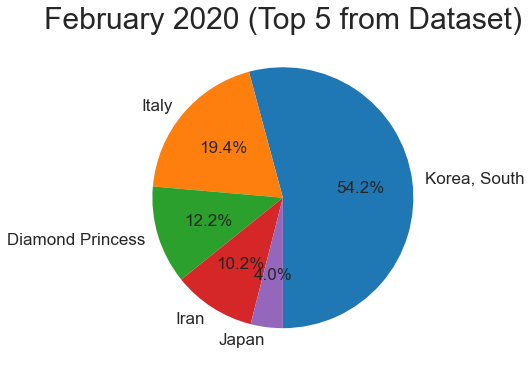

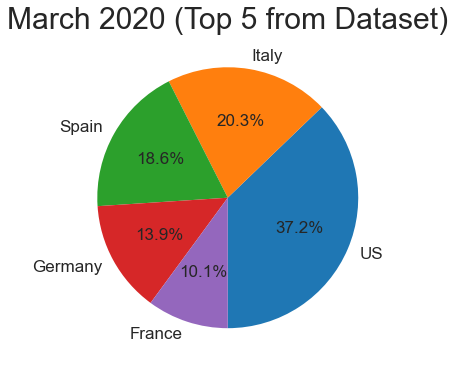

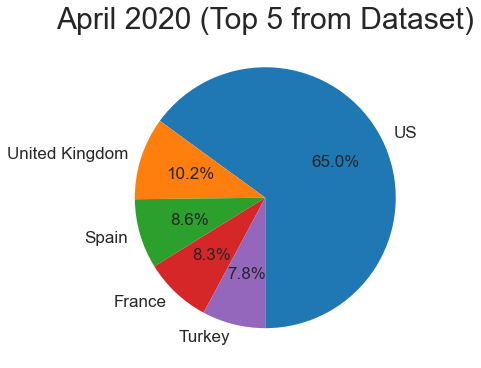

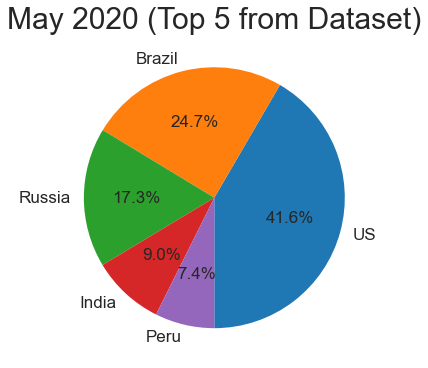

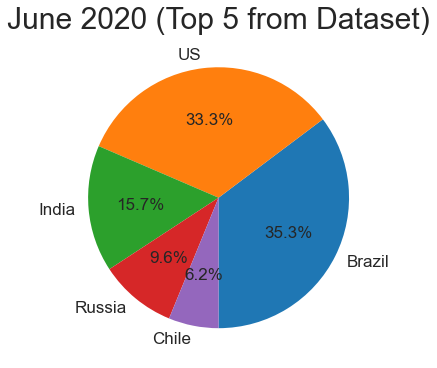

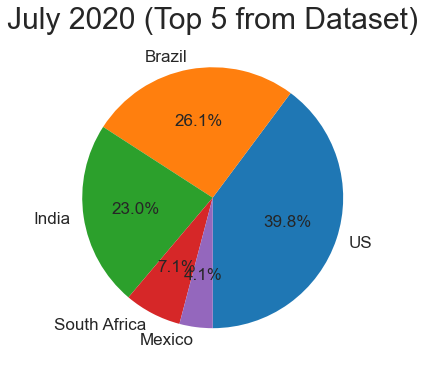

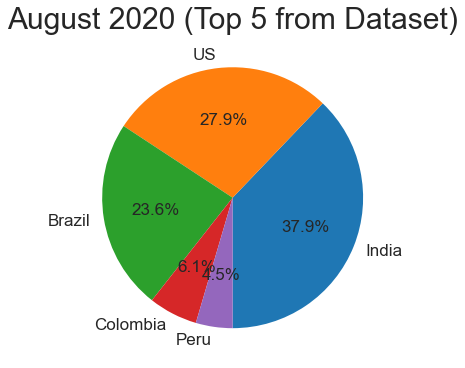

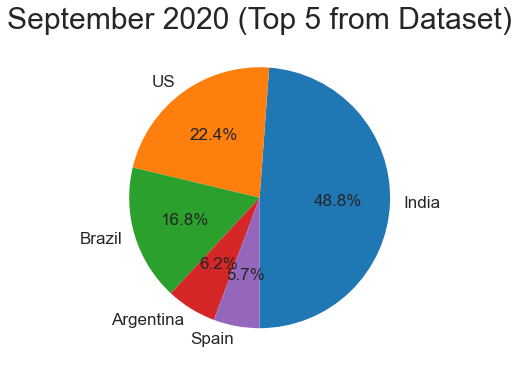

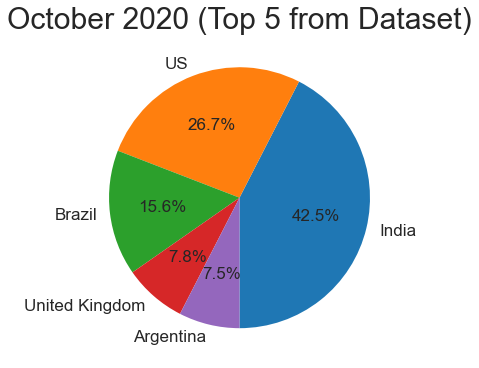

In [431]:
df1 = monthly_values.sort_values(by=col, ascending = False)[col].head(5)

# fig, ax = plt.subplots(5, 2, figsize=(10, 6))
for col in monthly_values.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.axis('off')
    df1 = monthly_values.sort_values(by=col, ascending = False)[col].head(5)
    df1.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)
    dt = (datetime.strptime(col, '%Y%m')).strftime("%B %Y")
    ax.set_title(dt + " (Top 5 from Dataset)", fontsize=30)

In [ ]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

---
### Summary
This noteboook can only be a basis to make deeper analytics.

Another COVID-19 dataset is it worth to make deeper covid-19 analysis. It is the dataset from [Data on COVID-19 (coronavirus) by *Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) 
You can download this one with:

---
```Python
fhand2 = urllib.request.urlopen('https://covid.ourworldindata.org/data/owid-covid-data.csv')

with open(f'data/{datetime.today().date()}/owid-covid-data.csv', mode='wb') as outputFile:
    outputFile.write(fhand2.read())  
```

---

Last but not least:  
    
**Thx to the instructor [Aakash N S](https://www.linkedin.com/in/aakashns/) and his team. It was a great time to follow your instructions in the Course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).**

---

In [ ]:
jovian.commit()